<a href="https://colab.research.google.com/github/Khadeja29/cs-412-Machine-Learning/blob/main/KHADEJAIQBAL_26242_ML202102_HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CS 412 Machine Learning 2020 

# Assignment 1

100 pts

## Goal 

The goal of this assignment 

*  Introduction to the machine learning experimental set up
*  Gain experience with the Scikit library
*  Gain experience with Decision tree and k-NN models

## Dataset

**Wine Quality Dataset** is a collection red and white wines with 12 attributes. The target variable is the 'quality' either 0 or 1


## Task
Build a decision tree and k-NN classifiers with the scikit-learn library function calls to **classify** the quality of wine as good (1) and bad (0)

## Submission

Follow the instructions at the end.

# 1) Initialize

First, make a copy of this notebook in your drive

In [ ]:
# Mount to your drive, in this way you can reach files that are in your drive
# Run this cell

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 2) Load Dataset
To start working for your homework, take a copy of the folder, given in the below link to your own google drive. You find the train and test data under this folder.

https://drive.google.com/drive/folders/1PC6M332CTdW-OOrgJ-1GU1F3UaRupka8?usp=sharing

After copy the folder, copy the path of the train and test dataset to paste them in the below cell to load your data.

In [ ]:
import pandas as pd
import numpy as np
import time

train_df = pd.read_csv('/content/drive/MyDrive/winequality-train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/winequality-test.csv')

# 3) Understand the dataset

You can use the fuctions that we saw in the recitations to understand the dataset

In [ ]:
# print shape of the train and test sets
print("Shape of the train set is: ", train_df.shape)
print("Shape of the train set is: ", test_df.shape)

# show random samples from the training data
train_df.sample(5)

Shape of the train set is:  (5198, 13)
Shape of the train set is:  (1299, 13)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,wine type,quality
4616,6.8,0.23,0.33,1.90,0.047,20.0,101.0,0.9914,3.10,0.46,11.1,0,0
1651,11.0,0.26,0.68,2.55,0.085,10.0,25.0,0.9970,3.18,0.61,11.8,1,0
1990,6.4,0.50,0.16,12.90,0.042,26.0,138.0,0.9974,3.28,0.33,9.0,0,0
79,9.4,0.59,0.14,2.00,0.044,25.0,48.0,0.9981,3.14,0.56,9.7,1,0
4923,6.7,0.75,0.12,2.00,0.086,12.0,80.0,0.9958,3.38,0.52,10.1,1,0


In [ ]:
# print information about the datasets (Is there any missing value? or Categorical feature?)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5198 entries, 0 to 5197
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         5198 non-null   float64
 1   volatile acidity      5198 non-null   float64
 2   citric acid           5198 non-null   float64
 3   residual sugar        5198 non-null   float64
 4   chlorides             5198 non-null   float64
 5   free sulfur dioxide   5198 non-null   float64
 6   total sulfur dioxide  5198 non-null   float64
 7   density               5198 non-null   float64
 8   pH                    5198 non-null   float64
 9   sulphates             5198 non-null   float64
 10  alcohol               5198 non-null   float64
 11  wine type             5198 non-null   int64  
 12  quality               5198 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 528.0 KB


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1299 entries, 0 to 1298
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1299 non-null   float64
 1   volatile acidity      1299 non-null   float64
 2   citric acid           1299 non-null   float64
 3   residual sugar        1299 non-null   float64
 4   chlorides             1299 non-null   float64
 5   free sulfur dioxide   1299 non-null   float64
 6   total sulfur dioxide  1299 non-null   float64
 7   density               1299 non-null   float64
 8   pH                    1299 non-null   float64
 9   sulphates             1299 non-null   float64
 10  alcohol               1299 non-null   float64
 11  wine type             1299 non-null   int64  
 12  quality               1299 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 132.1 KB


# 4) Define train and test labels

In [ ]:
# make sure you remove the labels from datasets
train_labels= train_df.pop("quality")
test_labels = test_df.pop("quality")


# 5) FineTune Decision Tree hyper-parameters

1-Splitting dataset into train and validation

In [ ]:
# Split training data to 70% training and 30% validation, do not forget to use the random_state parameter
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(train_df,train_labels,test_size=0.3,random_state=12)

2- FineTune minimum sample split

In [ ]:
from sklearn.tree import DecisionTreeClassifier

min_samples_splits = range(2, 50)

train_results = []
val_results = []
for min_samples_split in min_samples_splits:

  # Fit the tree using the 70% portion of the training data
  wine_model=DecisionTreeClassifier(random_state=12, min_samples_split= min_samples_split)
  wine_model.fit(x_train,y_train)
  
  # Evaluate on Training set
  train_acc = wine_model.score(x_train,y_train)
  train_results.append(train_acc)
 
   
  # Evaluate on Validation set
  val_acc = wine_model.score(x_val,y_val)
  val_results.append(val_acc)
  

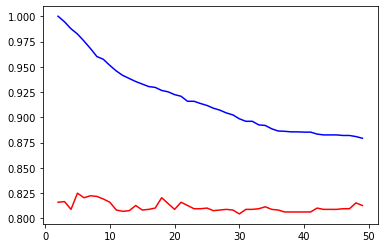

In [ ]:
# Plot the results
import matplotlib.pyplot as plt

plt.plot(min_samples_splits, train_results, 'b')
plt.plot(min_samples_splits, val_results,'r')
plt.show()

In [ ]:
# Computing the best possible hyperparameter value

#finding all indexes storing maximum validation score
max_value = np.amax(val_results)
indices = [i for i, value in enumerate(val_results) if value == max_value]
train_res=[]
if (len(indices) > 1):
  for i in indices:
    train_res.append(train_results[i])
  max_val = max(test_res)
  for j in test_res:
    if(test_res[j]== max_val):
      ind= j
      result=min_samples_splits[j]

else:
  result= min_samples_splits[indices[0]]
  max_val= train_results[indices[0]]

print("The model performces best when the min_samples_split= %d resulting in a validation score = %.5f%% and train score %.5f%%." % (result,max_value*100,max_val*100))

The model performces best when the min_samples_split= 5 resulting in a validation score = 82.50000% and train score 98.24079%.


In [ ]:
# Choose the best minimum split sample based on the plot
Best_minSampl = min_samples_splits[np.argmax(val_results)]

# Train decision tree using the full training data and the best minimum split sample
wine_quality_predictor=DecisionTreeClassifier(random_state=12, min_samples_split=Best_minSampl )
# measure training time
start_time = time.time()
wine_quality_predictor.fit(train_df,train_labels)
print("Time for the training: %.4f secs" % (time.time()-start_time))

# Estimate the prediction of the test data

# Performance on test set
start_time_acc = time.time()
test_pred = wine_quality_predictor.predict(test_df)
print("Time for the prediction: %.4f secs" % (time.time()-start_time_acc))
from sklearn.metrics import accuracy_score
# Calculate accuracy of test data

TestAcc = accuracy_score(test_labels,test_pred)
print("Testing Accuracy = %.4f%%" % (TestAcc * 100))

Time for the training: 0.0483 secs
Time for the prediction: 0.0027 secs
Testing Accuracy = 82.6790%


# 6) Apply the same procedure but using k-NN instead of decision tree

For finetuning, find the best value of K to use with this dataset.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# initialize the values of k to be a list of odd numbers between 1 and 30
kVals = list(range(1, 30,2))
accuracies = []
# loop over values of k for the k-Nearest Neighbor classifier
for k in kVals:
  modeltrain= KNeighborsClassifier(n_neighbors=k)
  modeltrain.fit(x_train,y_train)
  
  val_score = modeltrain.score(x_val,y_val)
  accuracies.append(val_score)
print("Best Validation Accuracy = %.4f%%" % (np.max(accuracies)*100))

Best Validation Accuracy = 80.3846%


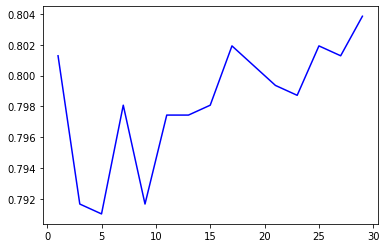

In [ ]:
# Plot the results
import matplotlib.pyplot as plt

plt.plot(kVals,accuracies, 'b')

plt.show()

In [ ]:
# Train k-NN using the full training data with the best K that you found
Best_k = kVals[np.argmax(accuracies)]
print("k value= %d" %(Best_k ) )

modeltrain1= KNeighborsClassifier(n_neighbors=Best_k)
# measure training time
start_time = time.time()
modeltrain1.fit(train_df,train_labels)
print("Time for the training: %.4f secs" % (time.time()-start_time))

# Estimate the prediction of the test data
# Performance on test set
start_time_acc = time.time()
test_p = modeltrain1.predict(test_df)
print("Time for the prediction: %.4f secs" % (time.time()-start_time_acc))

# Testing
from sklearn.metrics import accuracy_score
# Calculate accuracy of test data
TestAccuracy = accuracy_score(test_labels,test_p)
print("Testing Accuracy = %.4f%%" % (TestAccuracy * 100))


k value= 29
Time for the training: 0.0120 secs
Time for the prediction: 0.0765 secs
Testing Accuracy = 80.9084%


# 7) Notebook & Report

Notebook: We may just look at your notebook results; so make sure each cell is run and outputs are there.

Report: Write an at most 1/2 page summary of your approach to this problem at the end of your notebook; this should be like an abstract of a paper or the executive summary.

Must include statements such as:

( Include the problem definition: 1-2 lines )

(Talk about any preprocessing you did, explain your reasoning)

(Talk about train/val/test sets, size and how split)

(State what your test results are with the chosen method, parameters: e.g. "We have obtained the best results with the ….. classifier (parameters=....) , giving classification accuracy of …% on test data….")

(Comment on the speed of the algorithms and anything else that you deem important/interesting)


You will get full points from here as long as you have a good (enough) summary of your work, regardless of your best performance or what you have decided to talk about in the last few lines.





---
**Problem Definition:** The aim of this project is to build a machine learning model to classify the quality of a given wine as good or bad based on its attributes.Two of the following classification models are compared based on their performances :
1. Decision tree 
2. k-NN classifiers 

**Preprocessing:**The data set was divided into test and train data sets.In order to understand the data better, we analyzed the target variable (quality of wine) and predictor varaibles and thier data types.No exclusion of row/enteries was needed because as observed there were no null values in any of the columns for both data sets.Moreover,the data sets did not require any data extraction because there were no predictor varaibles (features other than the target feature/label) which were irrelevant example id of each entry etc that might effect the performance of the model.There seem to be two categorcial features i.e wine type and quality.Before spliting data for hyper-parameter tunning and training of the model, the target feature/label was removed from both the data sets which would effect the performace and result in a biased model and stored.

**HyperParameter Tunning:** To achieve the best possible accuracy results and performace for each,hyperparameter tunning is carried out for each model.In order to choose the best hyerparameter the train data set was used and split it in a ratio 70:30.While spliting the value of the random_state variable was kept to a value of 12 to ensure the same split is avhieved everytime.The bigger split of the train data is used to train the model while the smaller portion was kept for validation over a range of values for a hyperparameter in each model and the results are documented.The hyperparameter that performs the best and gives the highest validation accuracy result is then again used to create a model,if there are multiple similar highest validation accuracy scores we then chose amongst them based on highest training , the whole training set was used the next time to train the model and the test data set is used to find the test accuracy score for both the models.
It is important to note that for hyperparameter tunnning only the following hyerparatmeters were considered, the rest of the hyperparamters were set to deafult:

1. Decision tree = min_samples_split
2. k-NN classifiers = n_neighbors

**Results obtained:** 
1. The following table illustrates the suitable hyperparameter with the highest validation accuracy across a number of values:

a) Decision Trees

| Model 	| min_samples_split 	| Validation Accuracy Score (%) 	|
|-	|-	|-	|
| Decision Tree 	| 5 	| 82.5 	|

b) k-NN classifiers:

| Model 	| n_neigbors 	| Validation Accuracy Score (%) 	|
|-	|-	|-	|
| k-NN classifiers 	| 29 	|  80.3846	|



2. The following table illustrates the results for accuracy scores obtained with the best possible hyperparameters:

| Model 	| Validation Accuracy Score (%) 	| Test Accuracy Score (%) 	|
|-	|-	|-	|
| Decision Tree 	| 82.5 	| 82.6790% 	|
| k-NN classifiers 	| 80.3846 	| 80.9084 	|

**Best Performance:** From the data above it is evident that we have obtained the best test acuracy result and validation accuracy with the Decision Trees Classifier where 
```
DecisionTreeClassifier(random_state=12, min_samples_split= 5)
```
,giving the classification accuracy of 82.6790% on test data.

**Comments: Comparison between performance and Expalanation**

For each classification model we also tried to understand the speed of the training and predicition steps.In order to do so, times of these two process were recorded and are tabulated below:

| Model 	| Time for the training(s) 	|  Time for the prediction(s)	|
|-	|-	|-	|
| Decision Tree 	| 0.0483 	|  0.0027 	|
| k-NN classifiers 	| 0.0120 	| 0.0765  	|

It can be observed from the data above that although Decision tree classifier takes longer training time comapred to the time takes by k-NN classifier during training, it is almost 28 times faster in the predicition phase.

On research one possible explanation for this can be difference between the approach of the algorithms of both.
Decision Tree Classifier is considered  as an "Eager Learner"  because it takes time to first build a classification model on the training dataset before  classifing an unknown instances from test dataset.Since it focus on building a model first it therefore the learned model is "eager" to predict unseen data and does it at a faster rate aswell as with more accuracy.Therefore,it has eager in-memory classification model ready and doesnt have to acess the data as frequently as k-NN.

On the other hand, KNN-based classifier comes under the category of "Lazy Learners" . It does not build any classification model and takes lesser time than Decision tree classifier during training. It performs on-the-spot learning by directly learns from the training instances and  processes data only when a test instance if fed to it for classification.Hence,it requires frequent database lookups which might explain why it takes longer in the prediction phase because these lookups might be costly in terms of computation.  

Note: The above stated research is done using the following resource:
https://datascience.stackexchange.com/questions/9228/decision-tree-vs-knn

**Conclusion:**
The Decision Tree Classifier with hyperparameter tunning for min_samples_split=5 performs seems to be more efficeint choice of the two algorithm in terms of performace(accuracy of results) aswell as computational efficiecy(speed of the algorithm).




# 8) Submission
You will submit this homework via SUCourse.


Please read this document again before submitting it.

Please submit your **"share link" INLINE in Sucourse submissions.** That is we should be able to click on the link and go there and run (and possibly also modify) your code.

For us to be able to modify, in case of errors etc, you should get your "share link" as **share with anyone in edit mode** 

Download the **.ipynb and the .html** file and upload both of them to Sucourse.
 
Please do your assignment individually, do not copy from a friend or the Internet. Plagiarized assignments will receive -100.
